In [3]:
from datasets import load_dataset, DatasetDict
from tqdm import tqdm 
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ds = load_dataset("jlbaker361/wikiart")

In [5]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'text', 'style', 'name', 'gen_style'],
        num_rows: 73304
    })
    test: Dataset({
        features: ['image', 'text', 'style', 'name', 'gen_style'],
        num_rows: 8145
    })
})

Extracting dimensions: 100%|██████████| 73304/73304 [00:51<00:00, 1427.70it/s]


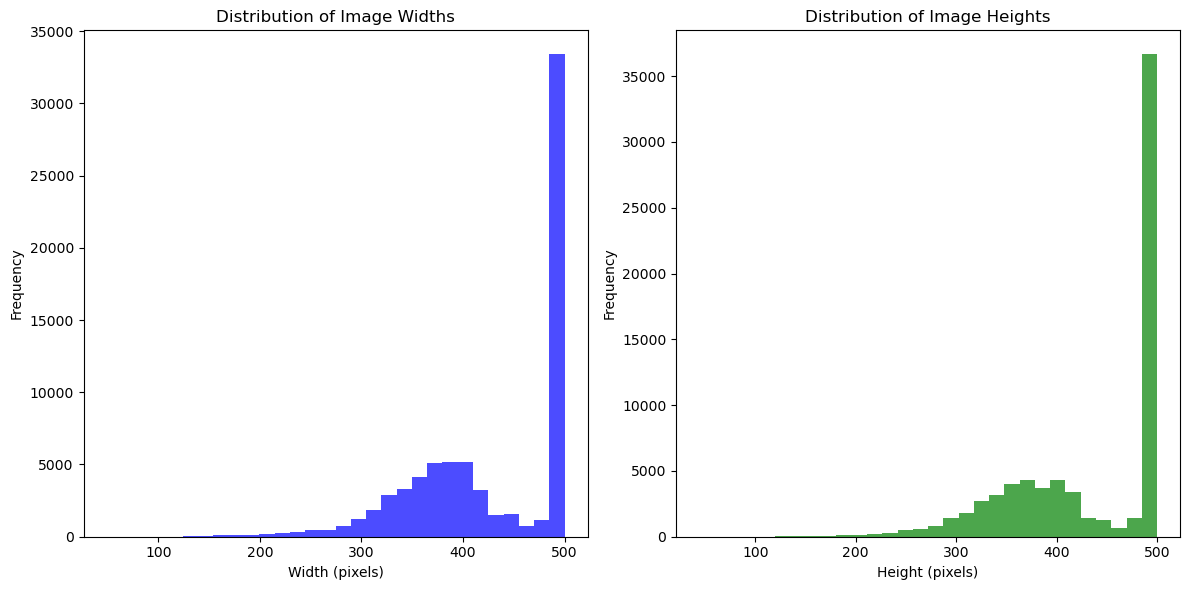

In [6]:
image_widths = []
image_heights = []
for img in tqdm(ds['train'], desc="Extracting dimensions"):
    if 'image' in img:
        # Extract width and height directly from the PIL image object
        width, height = img['image'].size
        image_widths.append(width)
        image_heights.append(height)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(image_widths, bins=30, color='blue', alpha=0.7)
plt.title("Distribution of Image Widths")
plt.xlabel("Width (pixels)")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
plt.hist(image_heights, bins=30, color='green', alpha=0.7)
plt.title("Distribution of Image Heights")
plt.xlabel("Height (pixels)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
# 2. Class Imbalance

Extracting styles: 100%|██████████| 73304/73304 [00:48<00:00, 1522.90it/s]


Class distribution in 'style':
impressionism: 11823
mannerism-late-renaissance: 1165
expressionism: 6054
post-impressionism: 5832
early-renaissance: 1284
realism: 9645
fauvism: 841
romanticism: 6293
art-nouveau-modern: 3868
symbolism: 4037
pop-art: 1330
baroque: 3799
abstract-expressionism: 2518
pointillism: 462
na-ve-art-primitivism: 2148
rococo: 1878
northern-renaissance: 2307
cubism: 2027
minimalism: 1201
synthetic-cubism: 197
high-renaissance: 1189
ukiyo-e: 1053
contemporary-realism: 422
color-field-painting: 1453
analytical-cubism: 105
new-realism: 280
action-painting: 93


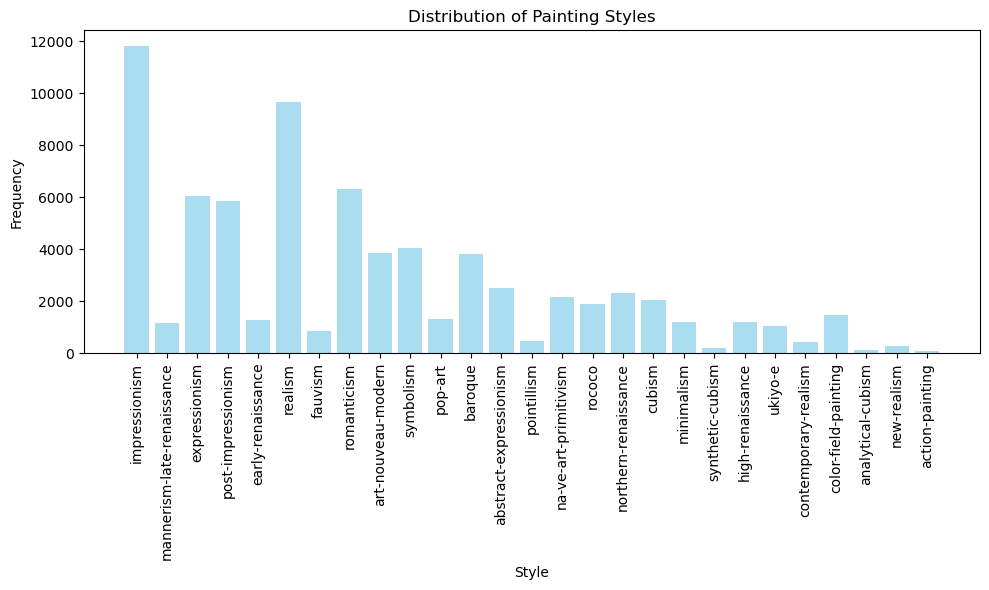

In [28]:
styles = [img['style'] for img in tqdm(ds['train'], desc="Extracting styles") if 'style' in img]
style_counts = Counter(styles)
print("Class distribution in 'style':")
for style, count in style_counts.items():
    print(f"{style}: {count}")
plt.figure(figsize=(10, 6))
plt.bar(style_counts.keys(), style_counts.values(), color='skyblue', alpha=0.7)
plt.xticks(rotation=90) 
plt.title("Distribution of Painting Styles")
plt.xlabel("Style")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
# 3. 2 Dimensional PCA with different colors for classes. TBD if we want this or something else now that we have less data. Maybe brightness?

In [ ]:
brightness_values = []

for img in ds['train']:
    if 'image' in img:
        grayscale_img = img['image'].convert('L')
        np_img = np.array(grayscale_img)
        brightness_values.append(np.mean(np_img))
plt.figure(figsize=(8, 6))
plt.hist(brightness_values, bins=30, color='gray', alpha=0.7)
plt.title("Distribution of Image Brightness")
plt.xlabel("Brightness (mean pixel value)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# 4. Color Distributions if u can fix would be dope, super tired rn. need to batch somehow

In [80]:
def visualize_rgb_distribution(dataset: DatasetDict, batch_size=5, num_batches=3):
    train_dataset = dataset['train']
    
    for batch in range(num_batches):
        start_idx = batch * batch_size
        end_idx = start_idx + batch_size
        batch_samples = train_dataset.select(range(start_idx, end_idx))
        
        fig, axes = plt.subplots(batch_size, 4, figsize=(20, 5*batch_size))
        fig.suptitle(f'RGB Distribution - Batch {batch+1}', fontsize=16)
        
        for i, sample in enumerate(batch_samples):
            img = sample['image']
            img_array = np.array(img)
            
            axes[i, 0].imshow(img)
            axes[i, 0].set_title(f'Image {start_idx+i+1}')
            axes[i, 0].axis('off')
            for j, color in enumerate(['Red', 'Green', 'Blue']):
                channel_data = img_array[:,:,j].ravel()
                axes[i, j+1].hist(channel_data, bins=256, range=(0,255), color=color.lower(), alpha=0.7)
                axes[i, j+1].set_title(f'{color} Channel')
                axes[i, j+1].set_xlim(0, 255)
                axes[i, j+1].set_ylim(0, img_array.shape[0]*img_array.shape[1]//10)  # Limit y-axis for better visibility
        
        plt.tight_layout()
        plt.show()


KeyboardInterrupt: 

In [ ]:
pixel_values = []
# Batching somewhere idk how 
for img in tqdm(ds['train'], desc="Extracting pixel values"):
    if 'image' in img:
        grayscale_img = img['image'].convert('L')
        np_img = np.array(grayscale_img).flatten()
        pixel_values.extend(np_img)
plt.figure(figsize=(8, 6))
plt.hist(pixel_values, bins=256, color='black', alpha=0.7)
plt.title("Distribution of Pixel Intensities")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


Extracting pixel values:   3%|▎         | 2199/73304 [00:16<06:48, 174.14it/s]

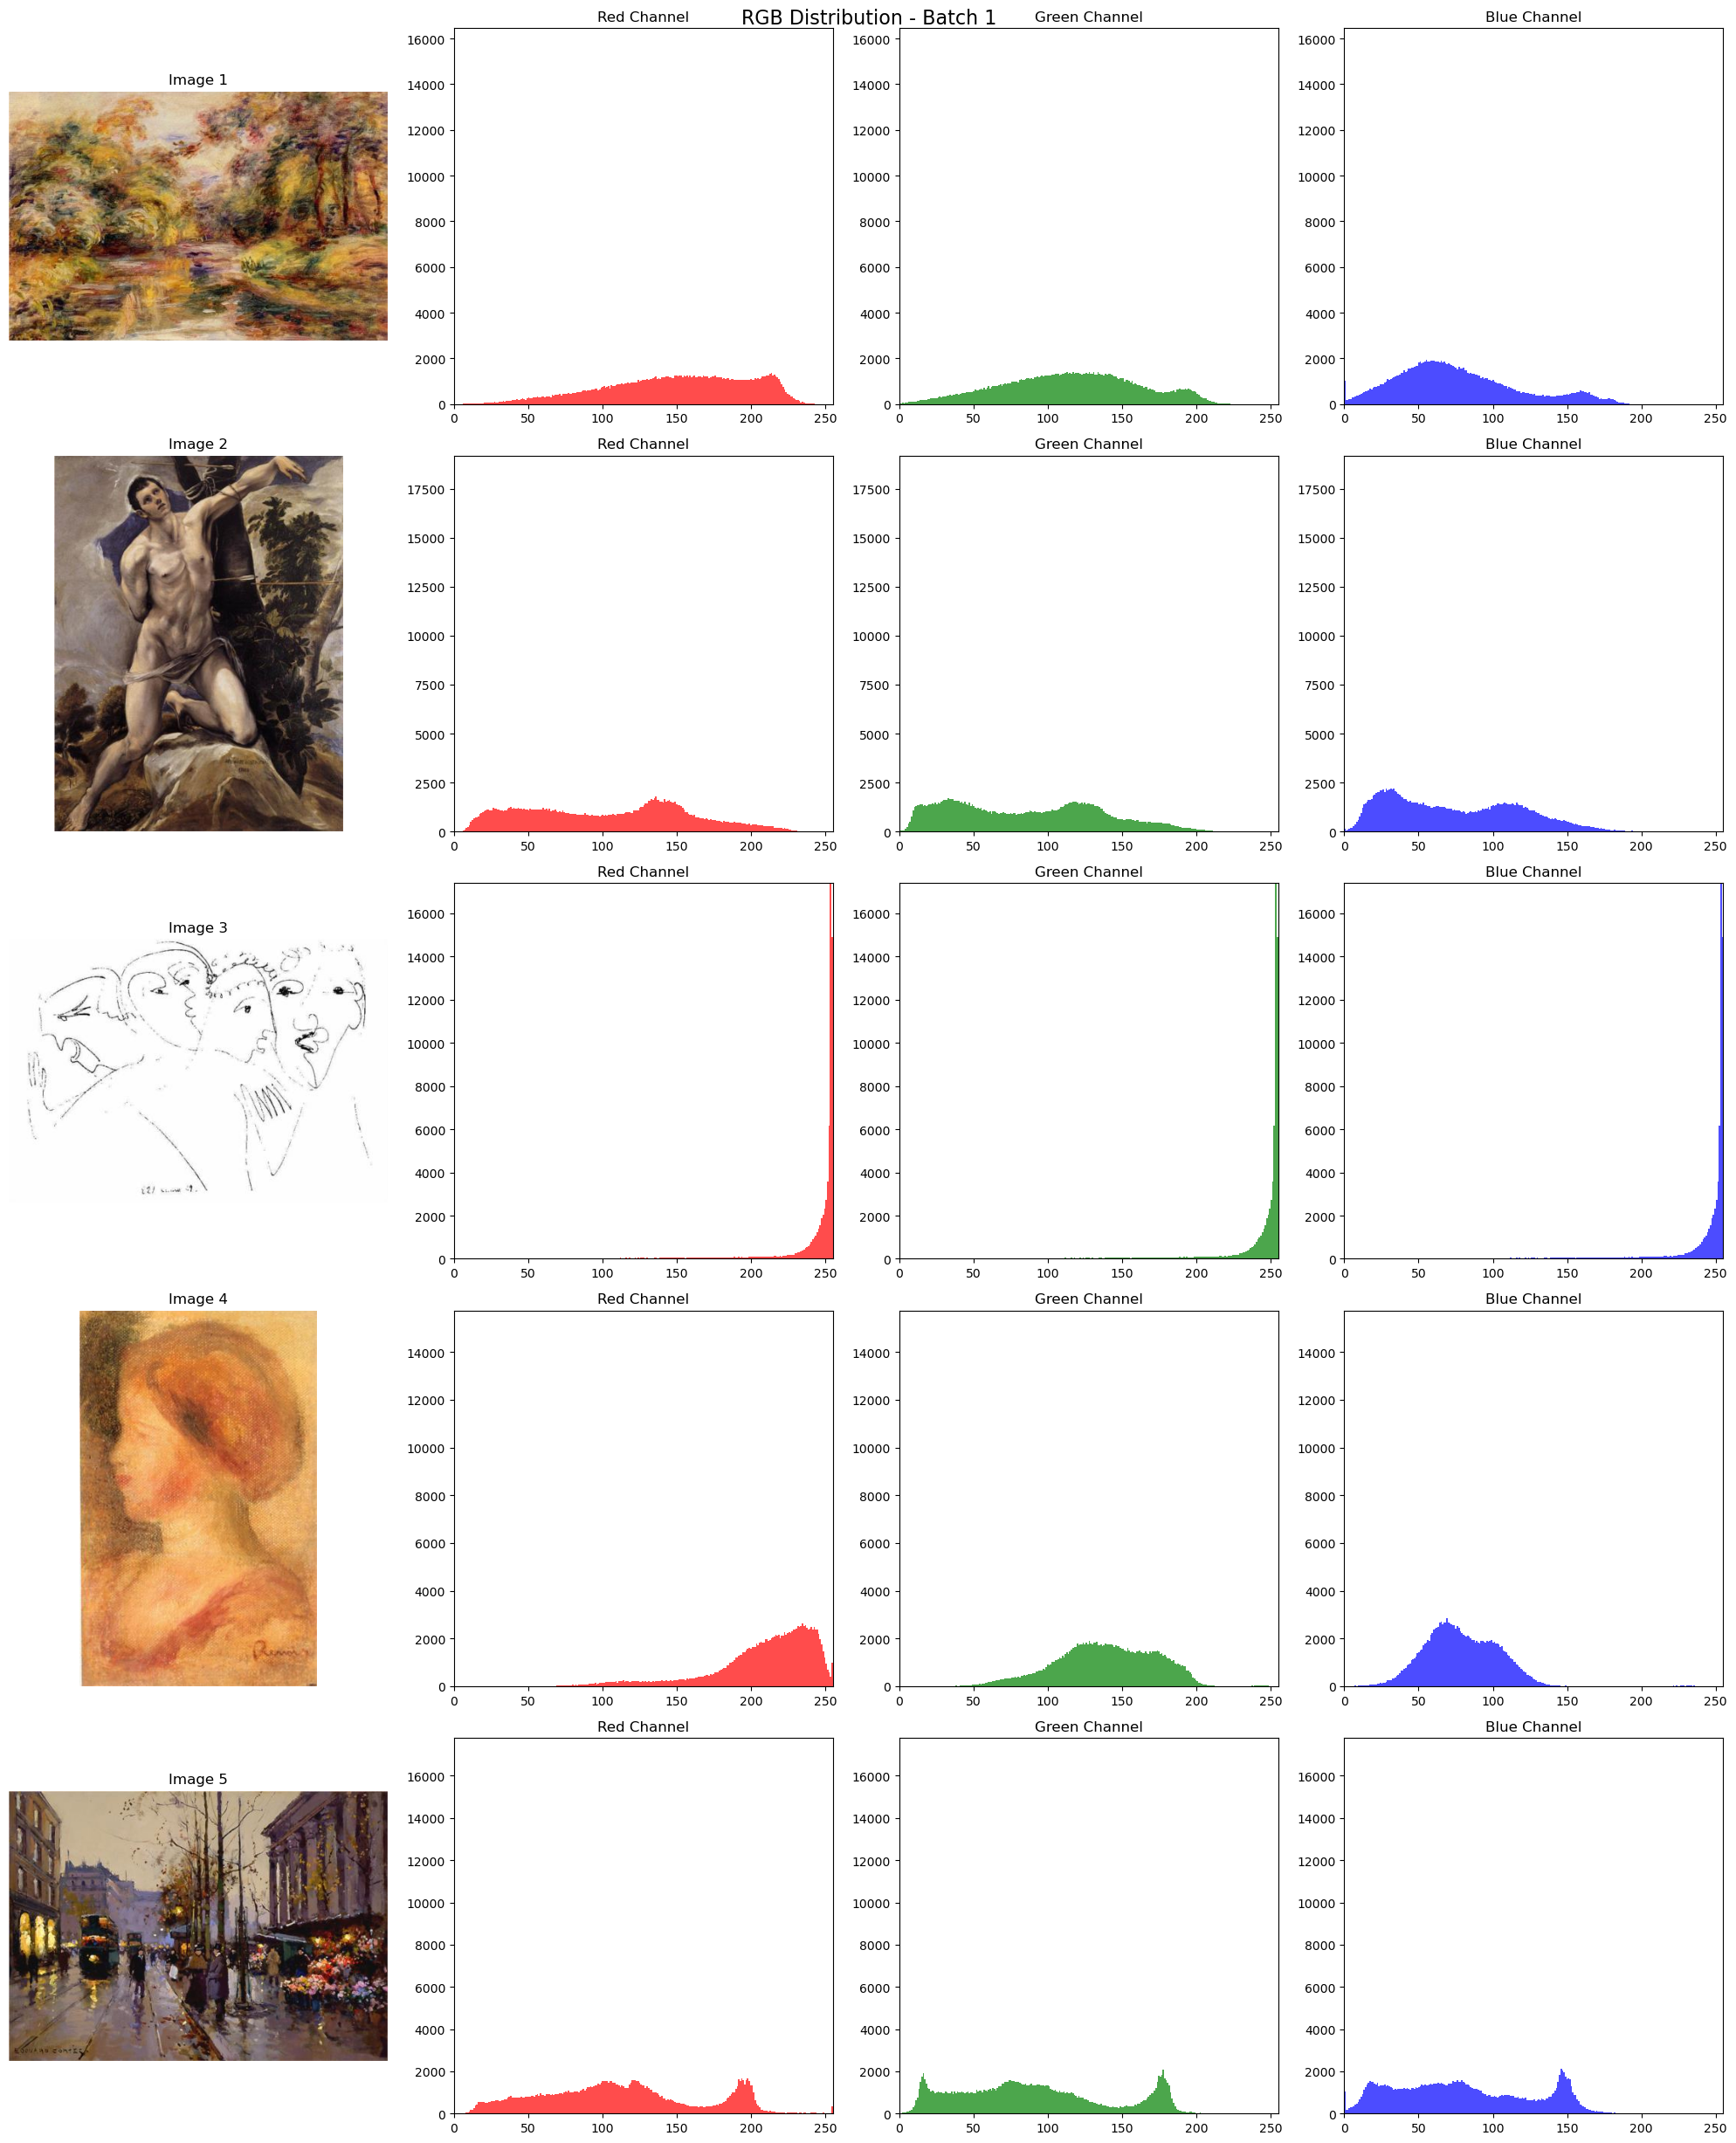

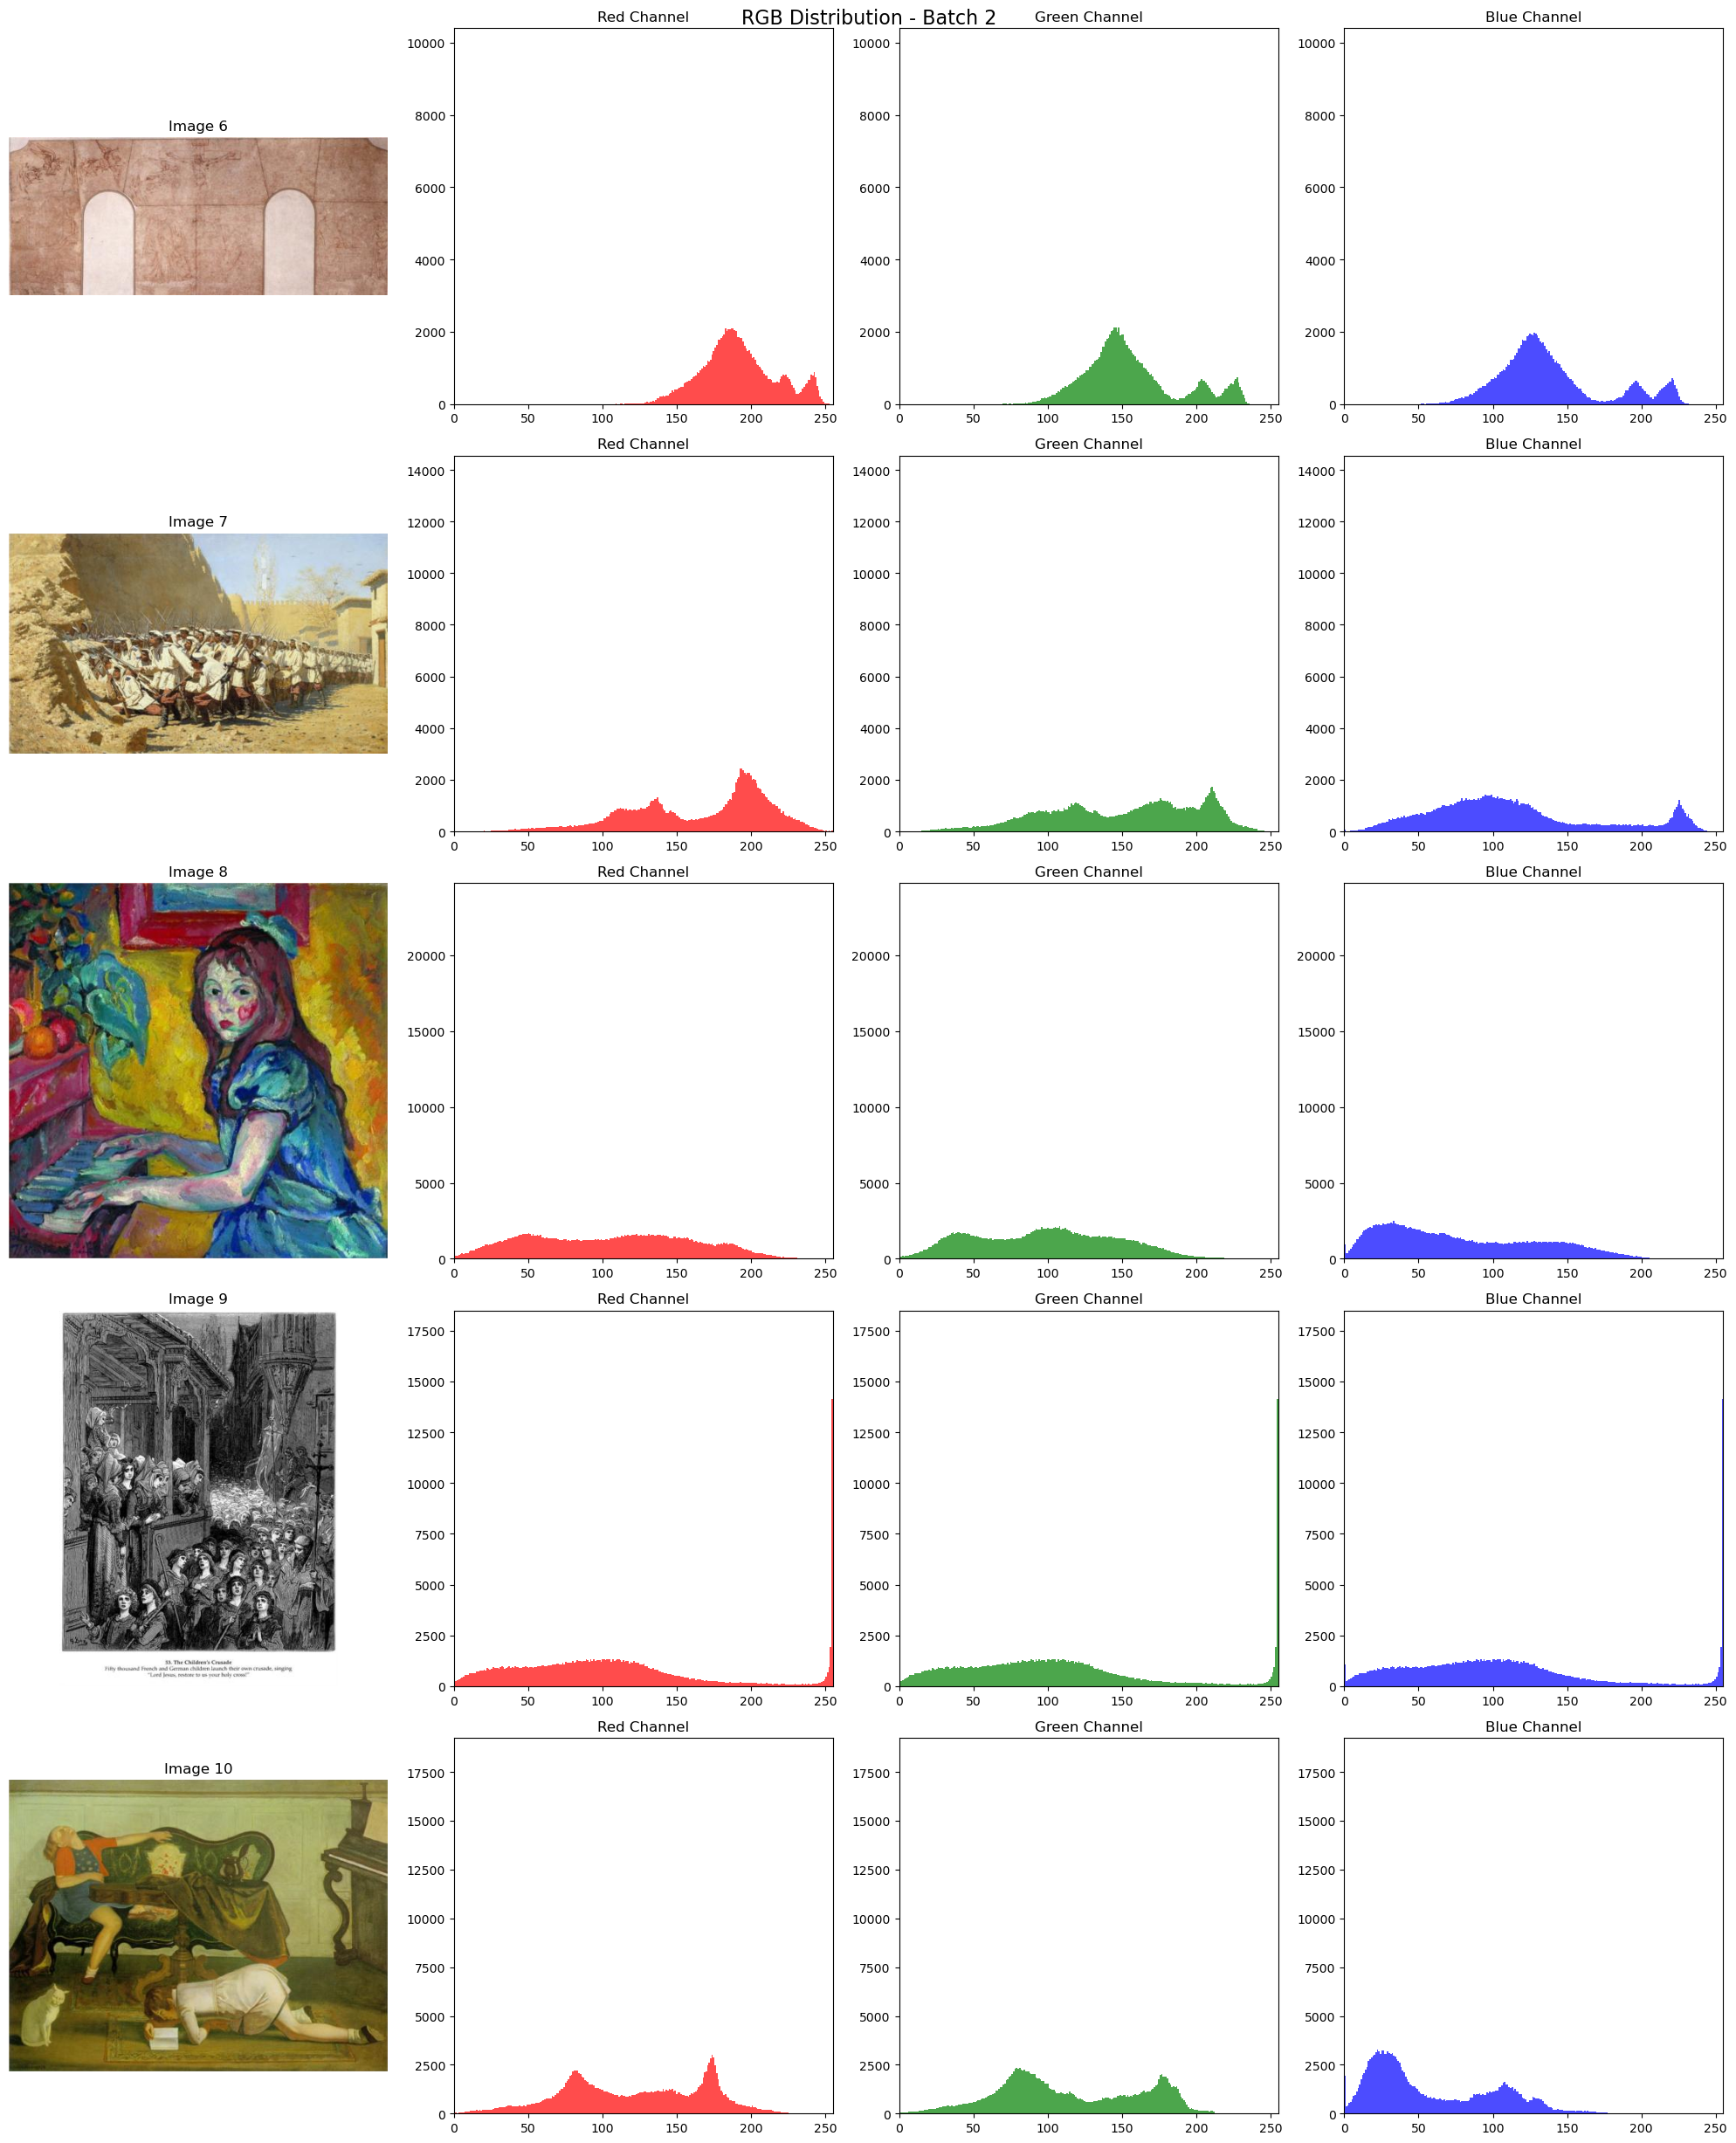

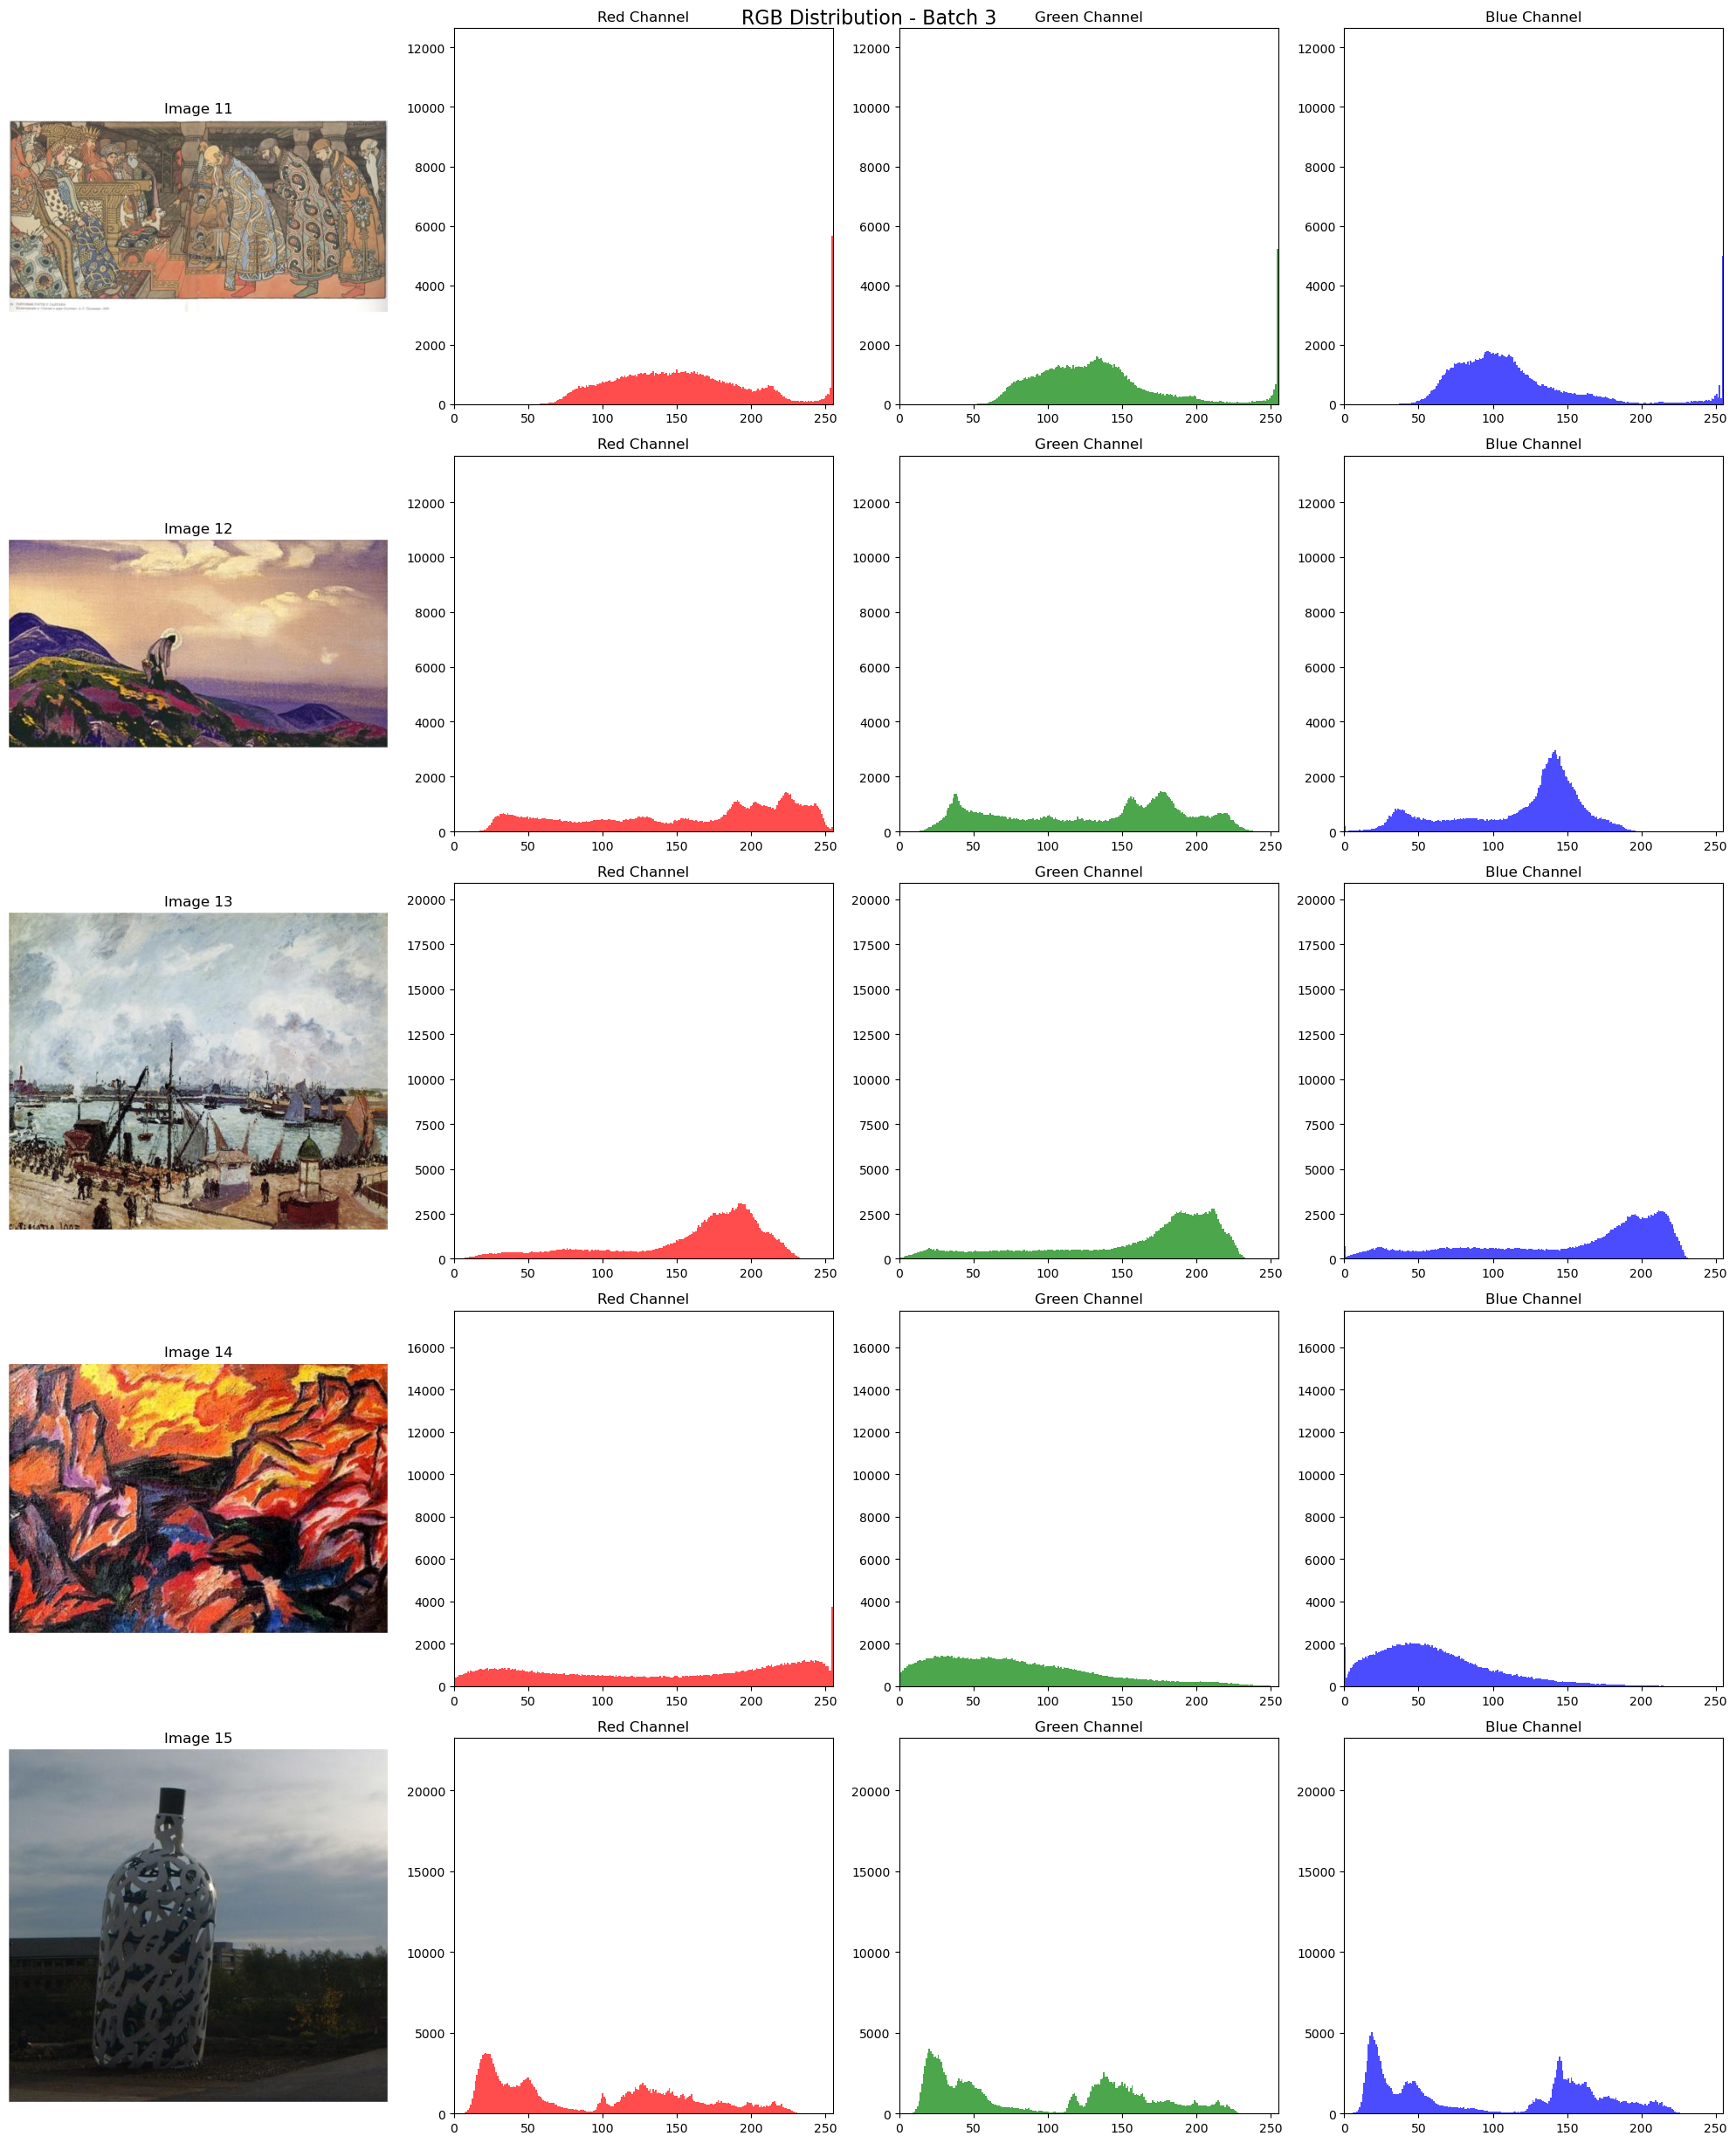

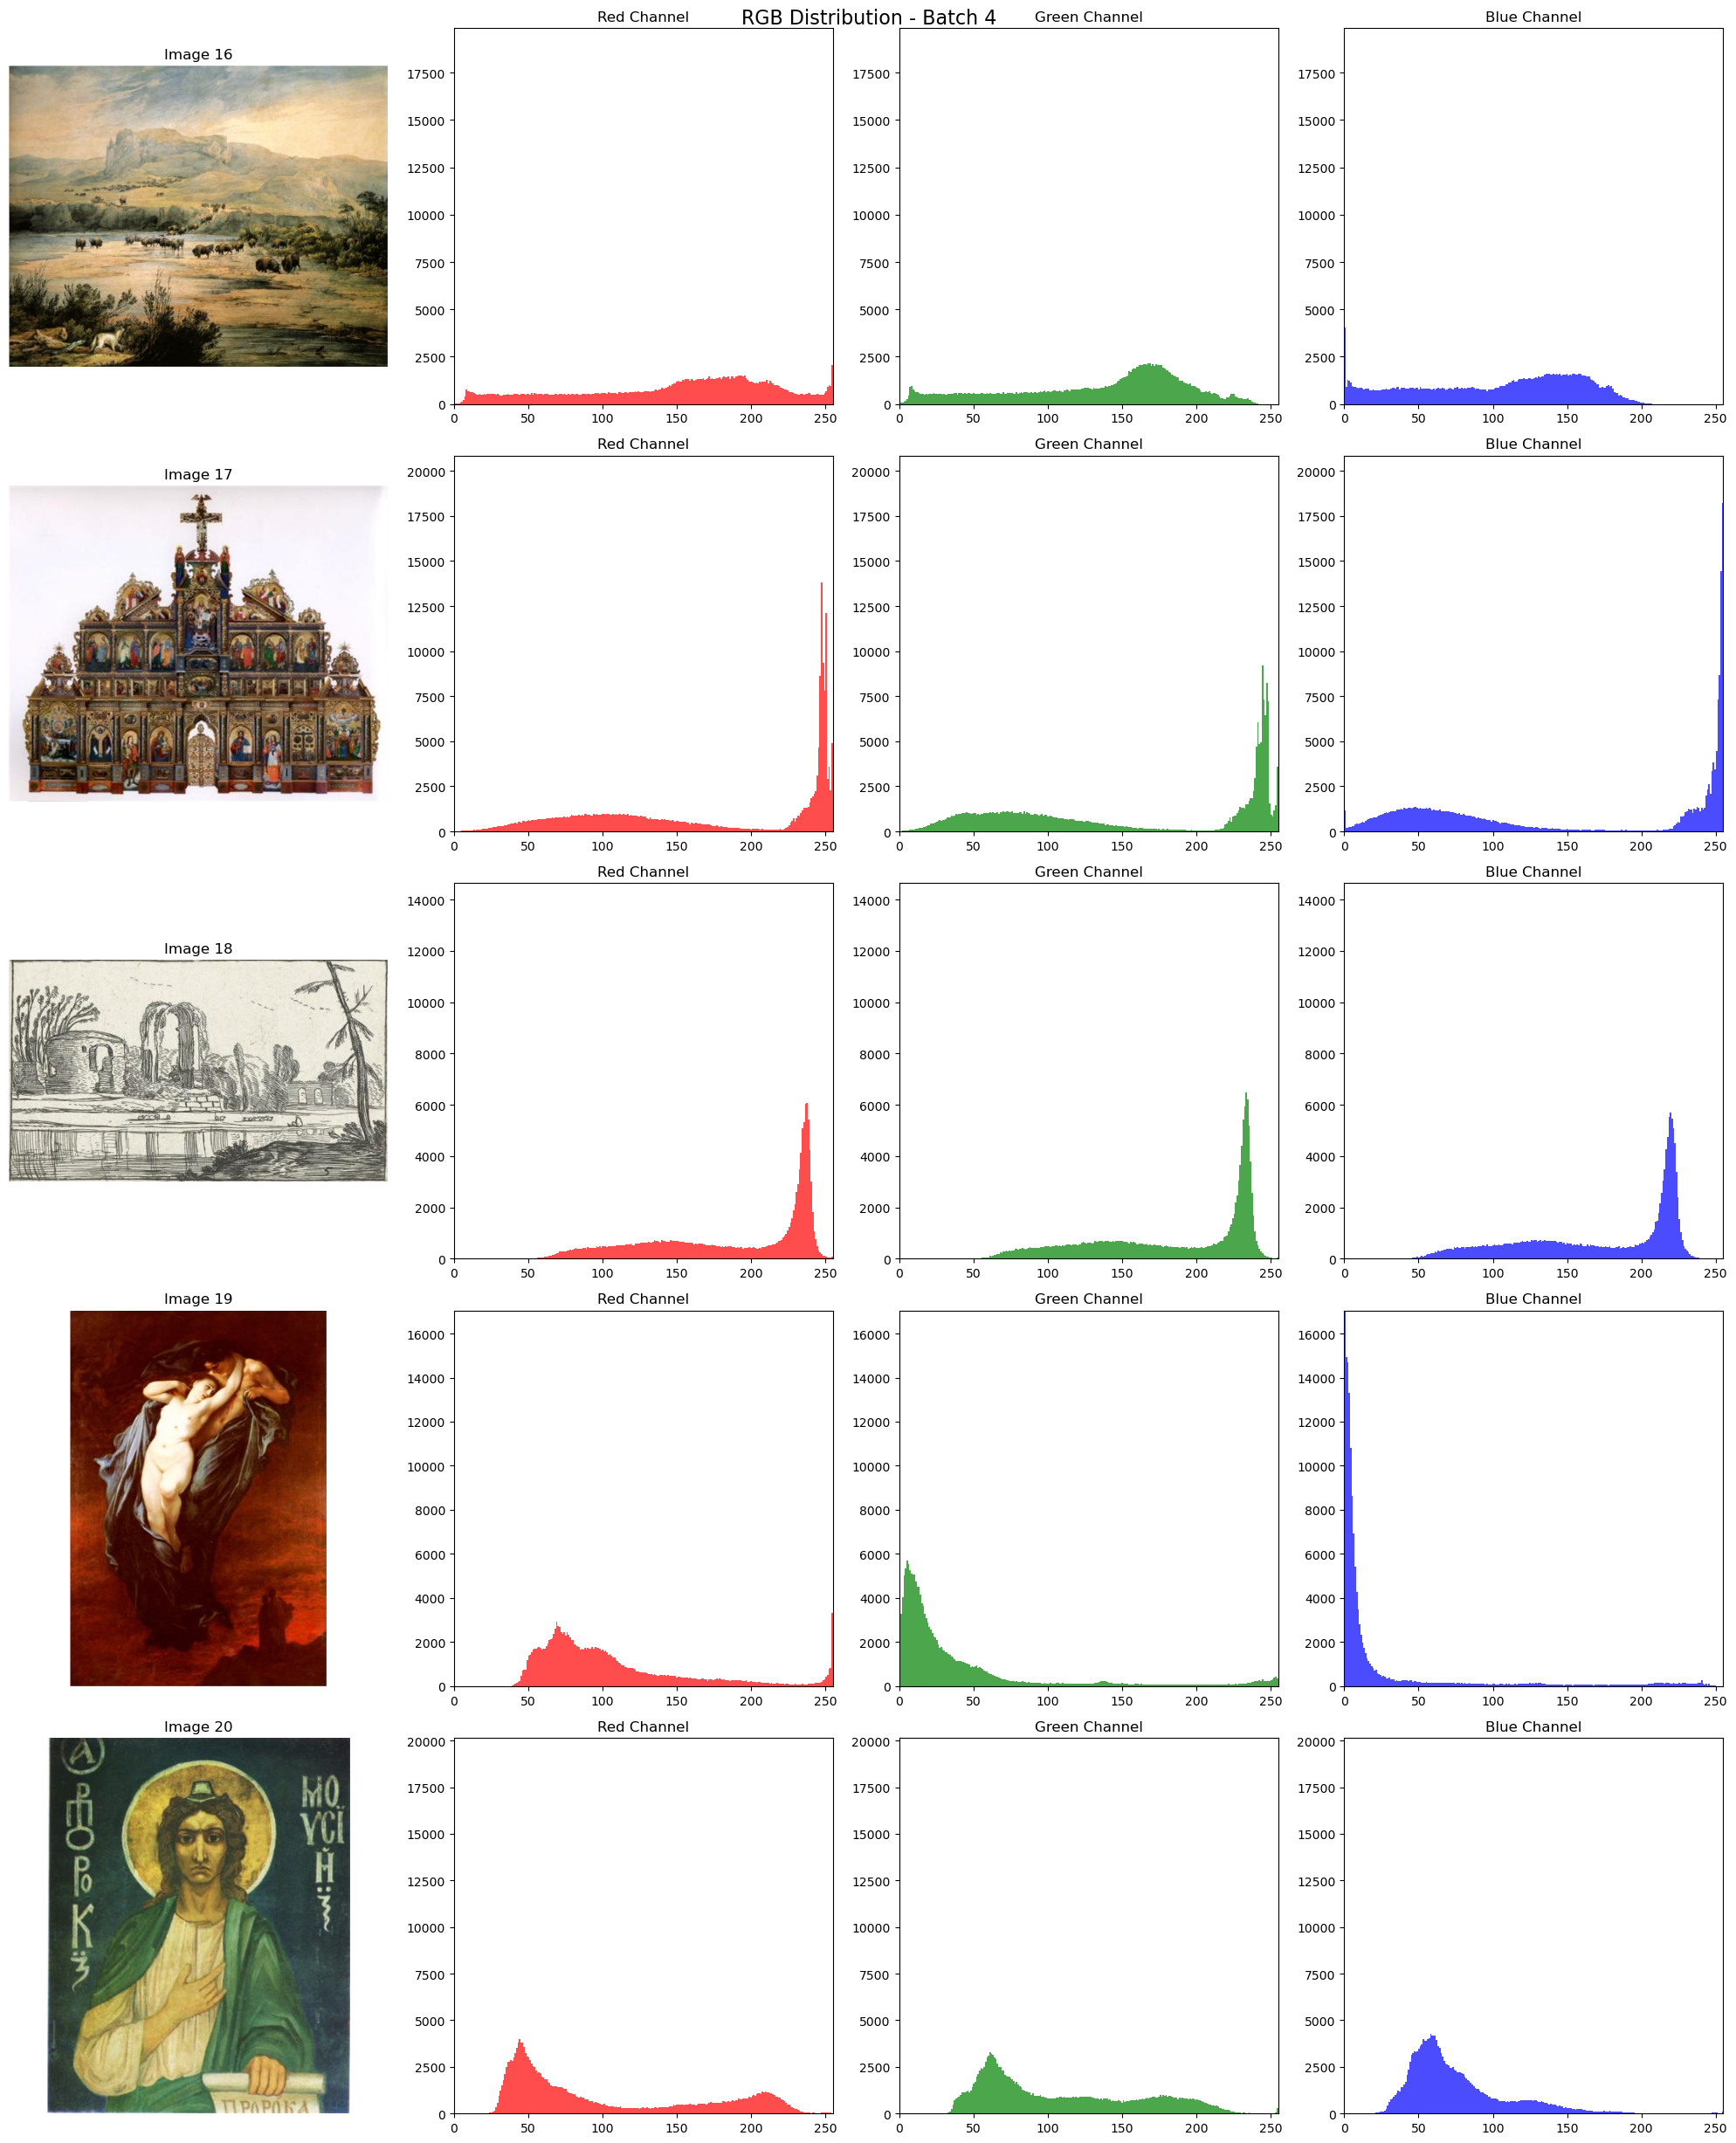

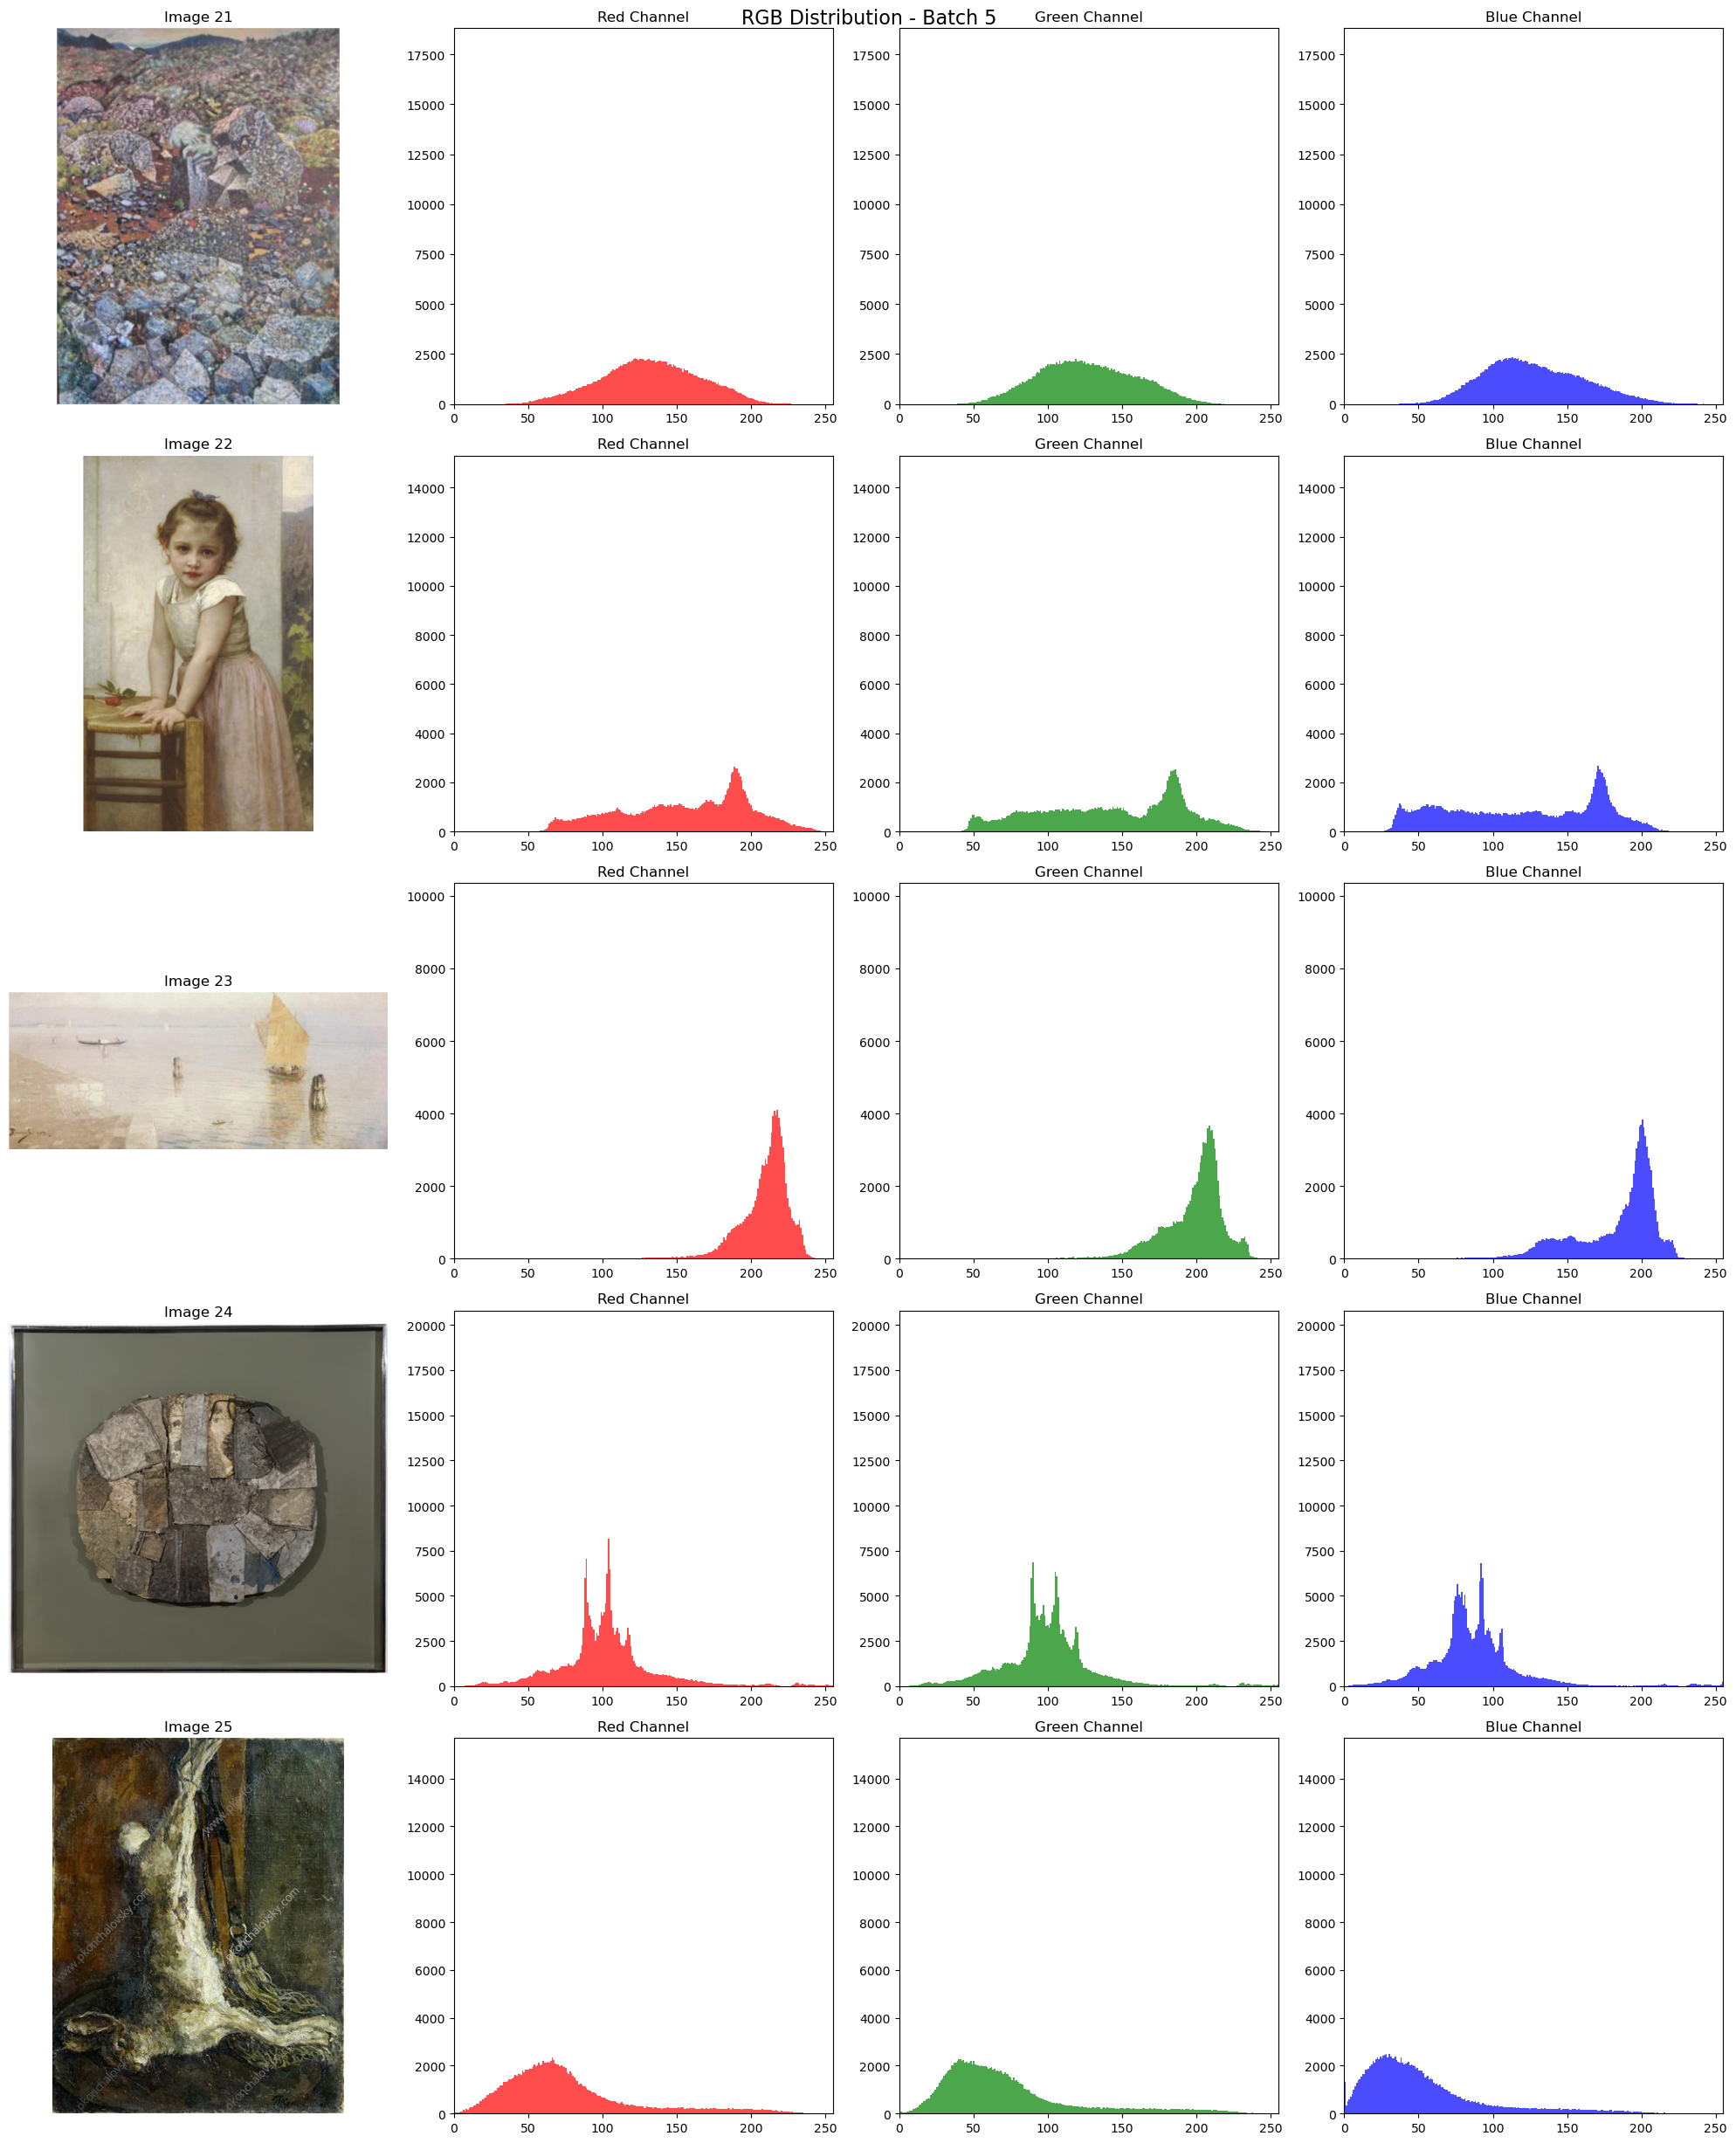

KeyboardInterrupt: 

In [79]:
visualize_rgb_distribution(ds, batch_size=5, num_batches=len(ds['train']))

In [ ]:
# 5. Small sample of the images

In [7]:
import matplotlib.pyplot as plt
from datasets import DatasetDict

def display_first_images(dataset: DatasetDict, num_images=5):
    samples = dataset['train'].select(range(num_images))
    plt.figure(figsize=(12, 8))
    for i, img_data in enumerate(samples):
        img = img_data['image']
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(img_data.get('style'))
    plt.tight_layout()
    plt.show()

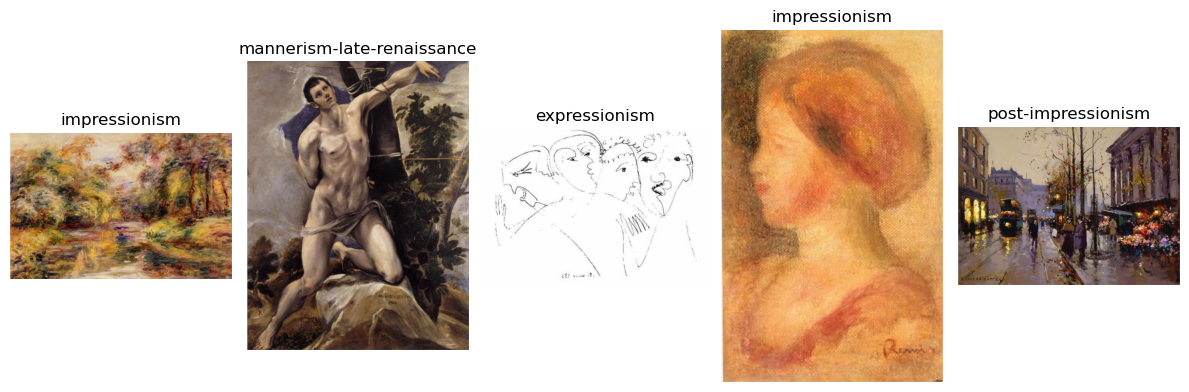

In [8]:
display_first_images(ds, num_images=5)